In [32]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import *
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Télécharger le dossier TiSnPd.cif
with MPRester("pBDutDDdaCLFGZOVupy8") as m:

    band_structure = m.get_bandstructure_by_material_id("mp-961682")

## Structure de bandes électroniques du TiSnPd

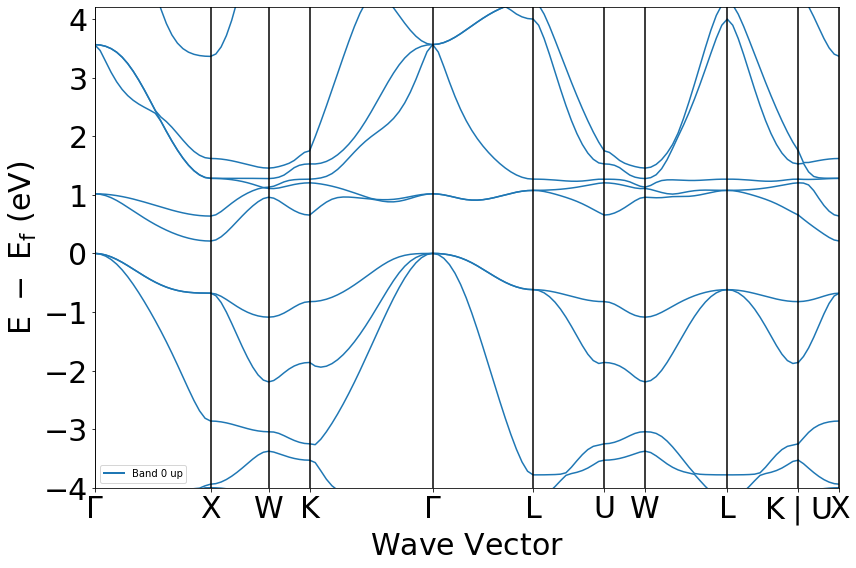

In [34]:
bplot = BSPlotter(band_structure)
bplot.show()

## Détermination de la bande interdite

In [35]:
band_gap = band_structure.get_band_gap()
energy = band_gap['energy']
direct = band_gap['direct']
transition = band_gap['transition']

print("Energie : {} ev \nBande directe : {} \nTransition : \u0393-X".format(energy, 'oui' if direct else 'non'))

Energie : 0.2110000000000003 ev 
Bande directe : non 
Transition : Γ-X


On constate que la bande interdite est indirecte et a une énergie inférieure à 1ev. Il s'agit d'un semi-conducteur. La bande interdite est indirecte, cela signifie qu'un électron ne peut pas passer du plus haut état d'énergie dans la bande de valence au plus bas état d'énergie dans la bande de conduction sans un changement de moment.

## Dispertion des bandes électroniques
Pour calculer la dispertion de la dernière bande de valence et de la première bande de conduction, il faut déterminer les pentes maximales et minimales de chaque branche de ces bandes. Une dispertion maximale correspond à une pente maximale. De manière équivalente, une dispertion minimale correspond à une pente minimale.

In [36]:
data = bplot.bs_plot_data()
e = data.get('energy')
dist = data.get('ticks').get('distance')

# Array ne contennant pas de distance redondante
d = np.array([dist[0], dist[1], dist[3], dist[5], dist[7], dist[9], dist[11], dist[13], dist[15], dist[17], dist[18]])

# Distance entre chaque branche
d_branch = d[1:] - d[0:-1]

Bande de valence

In [37]:
# Dernière bande de valance (16ème bande)
bv = list(band_structure.get_vbm()['band_index'].values())[0]
print("Bandes de valences contennant les énergies les plus haute : {}\nPar soucis de facilité, la dernière bande de valence sera la 16ème bande\n".format(bv))

# Calcul de la pente entre chaque branche
slope_v = np.zeros(np.shape(d_branch))
for i in range(np.size(d_branch)):
    slope_v[i] = ((e.get('1')[i][16][-1]) - (e.get('1')[i][16][0])) / d_branch[i]

# Calcul le minimum et maximum des pentes
max_v = np.max(np.abs(slope_v))
min_v = np.min(np.abs(slope_v))

Bandes de valences contennant les énergies les plus haute : [14, 15, 16]
Par soucis de facilité, la dernière bande de valence sera la 16ème bande



Bande de conduction

In [38]:
# Première bande de conduction (17ème bande)
bc = list(band_structure.get_cbm()['band_index'].values())[0]
print("Bande de conduction contennant l'énergie la plus basse : {}\nLa première bande de conduction est la 17ème bande\n".format(bc))

# Calcul de la pente entre chaque branche
slope_c =  np.zeros(np.shape(d_branch))
for i in range(np.size(d_branch)):
    slope_c[i] = ((e.get('1')[i][17][-1]) - (e.get('1')[i][17][0])) / d_branch[i]

# Calcul le minimum et maximum des pentes
max_c = np.max(np.abs(slope_c))
min_c = np.min(np.abs(slope_c))

Bande de conduction contennant l'énergie la plus basse : [17]
La première bande de conduction est la 17ème bande



Dernière bande de valence :

 - Direction présentant le plus de dispertion : X - W (max_v = 0.8098820405289321)
 - Direction présentant le moins de dispertion : L - K | U (min_v = 0.3306329585233185)

Première bande de conduction :

 - Direction présentant le plus de dispertion : X - W (max_c = 1.479112852231269)
 - Direction présentant le moins de dispertion : Γ - L (min_c = 0.06647162369631965)


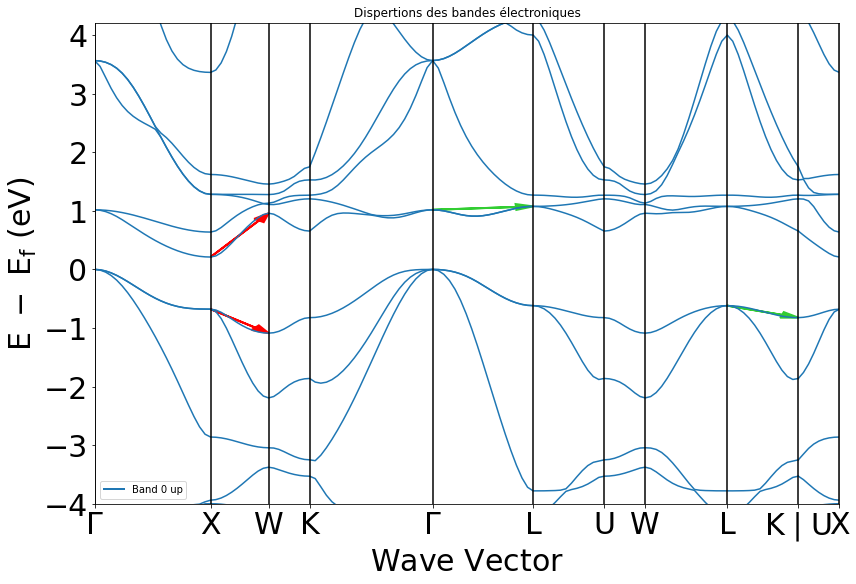

In [39]:
bplot.get_plot()

# Flèche représentant la pente maximum de la dernière bande de valence
plt.arrow(d[1], (e.get('1')[1][16][0]), d_branch[1],(e.get('1')[1][16][-1]) - (e.get('1')[1][16][0]), color='red', head_width = 0.1, linewidth=2, length_includes_head=True)

# Flèche représentant la pente minimum de la dernière bande de valence
plt.arrow(d[8], (e.get('1')[8][16][0]), d_branch[8],(e.get('1')[8][16][-1]) - (e.get('1')[8][16][0]), color='limegreen', head_width = 0.1, linewidth=2, length_includes_head=True)

# Flèche représentant la pente maximum de la première bande de conduction
plt.arrow(d[1], (e.get('1')[1][17][0]), d_branch[1],(e.get('1')[1][17][-1]) - (e.get('1')[1][17][0]), color='red', head_width = 0.1, linewidth=2, length_includes_head=True)

# Flèche représentant la pente maximum de la première bande de conduction
plt.arrow(d[4], (e.get('1')[4][17][0]), d_branch[4],(e.get('1')[4][17][-1]) - (e.get('1')[4][17][0]), color='limegreen', head_width = 0.1, linewidth=2, length_includes_head=True)

print("Dernière bande de valence :\n\n - Direction présentant le plus de dispertion : X - W (max_v = {})\n - Direction présentant le moins de dispertion : L - K | U (min_v = {})\n".format(max_v, min_v))
print("Première bande de conduction :\n\n - Direction présentant le plus de dispertion : X - W (max_c = {})\n - Direction présentant le moins de dispertion : \u0393 - L (min_c = {})".format(max_c, min_c))
plt.title("Dispertions des bandes électroniques")
plt.show()

## Masse effective
La formule pour calculer la masse effective $m^{*}$ est donnée par :
### $$m^{*} = \frac{\hbar^{2}}{\frac{\partial^{2}E}{\partial k^{2}}}$$

avec $\hbar$ la constante de Planck réduite ($\hbar$ = 1.054571817...×10−34 J⋅s) et le terme du dénominateur correspondant à la dérivée seconde de l'énergie de la bande électronique par rapport au vecteur d'onde k.

Pour calculer le terme au dénominateur, on considère une dispertion parabolique :
$$ E(k) = ak^{2} + bk + c$$
avec a,b,c des constantes à déterminer. 

L'expression de la masse effective devient alors : 
### $$ m^{*} = \frac{\hbar^{2}}{2a}$$

In [40]:
# Extrema des bandes de valence et conduction 
ext_v = data['vbm']
ext_c = data['cbm'] 
print("Maximums de la bande de valence : {}\nMinimums de la bande de conduction : {}".format(ext_v, ext_c))

#list(data.get('distances')[4]).index(data['vbm'][1][0]) 
#list(data.get('distances')[1]).index(data['cbm'][1][0])

Maximums de la bande de valence : [(0.0, 0.0), (2.9463032212848246, 0.0), (2.9463032212848246, 0.0)]
Minimums de la bande de conduction : [(1.0110114300907882, 0.2110000000000003), (1.0110114300907882, 0.2110000000000003), (6.489881943330469, 0.2110000000000003)]


Pour calculer la masse effective, le point maximale de la bande de valence sera $(2.9463032212848246, 0.0)$  et le point minimale de la bande de conduction sera $(1.0110114300907882, 0.2110000000000003)$. 

In [41]:
# Bande de valence
x_v = [data.get('distances')[3][-2], data.get('distances')[4][0], data.get('distances')[4][2]]
y_v = [e.get('1')[3][16][-2], e.get('1')[4][16][0], e.get('1')[4][16][2]]

# Calcul des constantes a,b,c
abc_v = np.polyfit(x_v, y_v, 2)

# Equation de la parabole 
def f_v(k):
    return abc_v[0]*k*k + abc_v[1]*k + abc_v[2]

x_plot_v = np.arange(0, 6, 0.01)
y_plot_v = f_v(x_plot_v)

In [42]:
# Bande de conduction
x_c = [data.get('distances')[0][-2], data.get('distances')[1][0], data.get('distances')[1][2]]
y_c = [e.get('1')[0][17][-2], e.get('1')[1][17][0], e.get('1')[1][17][2]]

# Calcul des constantes a,b,c
abc_c = np.polyfit(x_c, y_c, 2)

# Equation de la parabole 
def f_c(k):
    return abc_c[0]*k*k + abc_c[1]*k + abc_c[2]

x_plot_c = np.arange(0, 2, 0.01)
y_plot_c = f_c(x_plot_c)

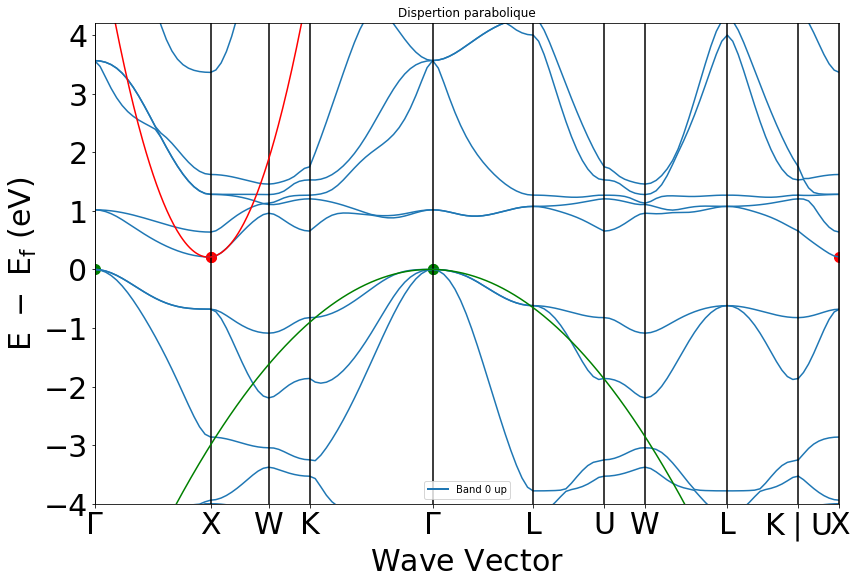

In [43]:
bplot.get_plot(vbm_cbm_marker=True)
# Paraboles
plt.plot(x_plot_v, y_plot_v, color='green')
plt.plot(x_plot_c, y_plot_c, color='red')
plt.title("Dispertion parabolique")
plt.show()

In [44]:
hbar = 1.054571818*10**(-34) #[J.s]
eV = 1.602176563*10**(-19) #[J]
A = 10**-10 #[m]

# Masse effective au sommet de la dernière bande de valence
me_v = (hbar**2) / (2*abc_v[0]*(A**2)*eV)

# Masse effective à la base de la première bande de conduction
me_c = (hbar**2) / (2*abc_c[0]*(A**2)*eV)

print("Valeur de la masse effective au sommet de la bande de valence : {} kg\nValeur de la masse effective à la base de la bande conduction : {} kg".format(me_v, me_c))

Valeur de la masse effective au sommet de la bande de valence : -4.251028767582355e-30 kg
Valeur de la masse effective à la base de la bande conduction : 5.718963299838367e-31 kg
